# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(mouse_metadata, study_results, on=('Mouse ID'))
complete_df = complete_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [19]:
# Checking the number of mice.
len(complete_df['Mouse ID'].unique())

249

In [37]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_df[complete_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_df[complete_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df[complete_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [105]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sorted_df = cleaned_df.groupby('Drug Regimen')
mean_values = sorted_df['Tumor Volume (mm3)'].mean()
median_values = sorted_df['Tumor Volume (mm3)'].median()
variance_values = sorted_df['Tumor Volume (mm3)'].var()
std_values = sorted_df['Tumor Volume (mm3)'].std()
sem_values = sorted_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_values,
    'Mediam Tumor Volume': median_values,
    'Tumor Volume Variance': variance_values,
    'Tumor Volume Std. Dev': std_values,
    'Tumor Volume Std. Err.': sem_values,
})
summary_df

# sorted_df['Tumor Volume (mm3)'].describe() also gets a very similar and quick dataframe.


,Mean Tumor Volume,Mediam Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_single_line = sorted_df['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})
summary_single_line

,var,median,mean,std,sem
Drug Regimen,,,,,
Capomulin,24.947764,41.557809,40.675741,4.994774,0.329346
Ceftamin,39.290177,51.776157,52.591172,6.268188,0.469821
Infubinol,43.128684,51.820584,52.884795,6.567243,0.492236
Ketapril,68.553577,53.698743,55.235638,8.279709,0.603860
Naftisol,66.173479,52.509285,54.331565,8.134708,0.596466
Placebo,61.168083,52.288934,54.033581,7.821003,0.581331
Propriva,43.852013,50.446266,52.320930,6.622085,0.544332
Ramicane,23.486704,40.673236,40.216745,4.846308,0.320955
Stelasyn,59.450562,52.431737,54.233149,7.710419,0.573111


## Bar and Pie Charts

In [120]:
grouped = cleaned_df['Mouse ID'].groupby(cleaned_df['Drug Regimen']).count()
grouped

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

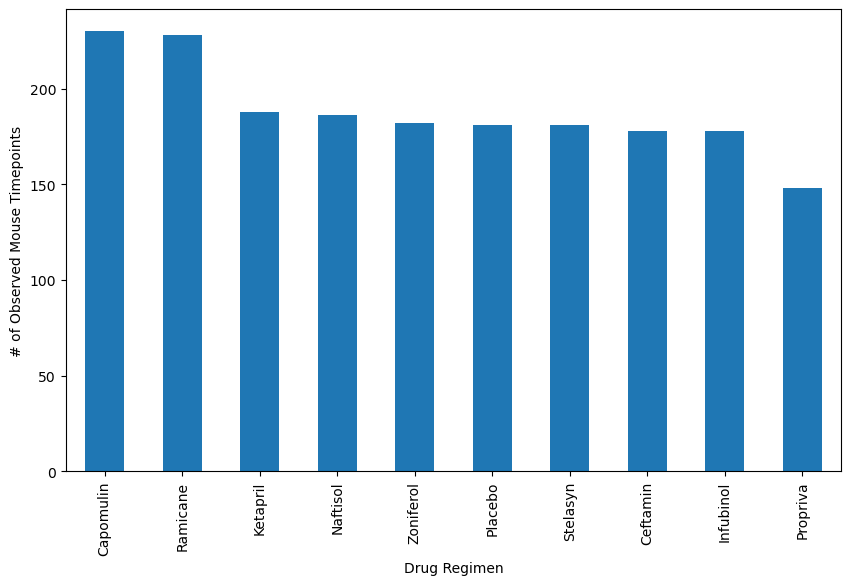

In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
values = cleaned_df['Mouse ID'].groupby(cleaned_df['Drug Regimen']).count()
values = values.sort_values(ascending=False)

figure1 = values.plot(kind="bar", figsize=(10,6),
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")


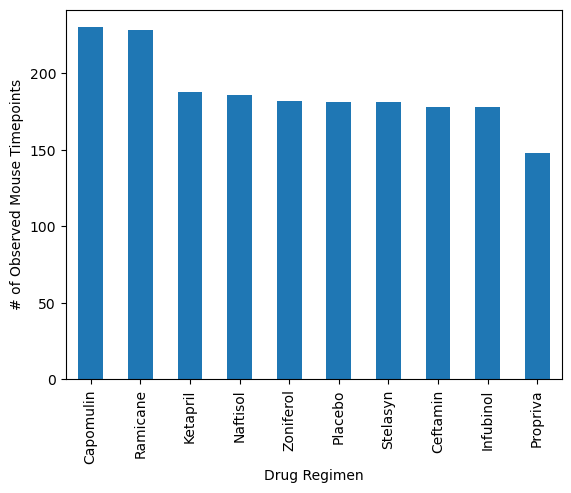

In [138]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
values.plot.bar(x='Drug Regimen', y='val')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

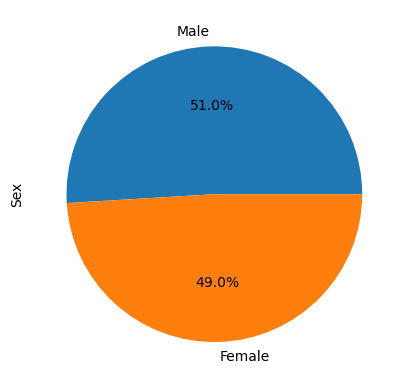

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned_df['Mouse ID'].groupby(cleaned_df['Sex']).count()
gender = gender.sort_values(ascending=False)
gender.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')
plt.show()

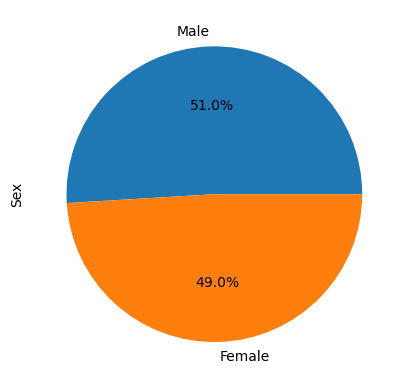

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender.plot.pie(autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
cleaned_reduced = cleaned_df[cleaned_df['Drug Regimen'].isin(drug_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
grouped = cleaned_reduced.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_vol = pd.merge(grouped.reset_index(), cleaned_reduced, on=['Mouse ID', 'Timepoint'], how='inner')


In [165]:
final_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [228]:
# Put treatments into a list for for loop (and later for plot labels)
# ** refer to drug_regimens in the above cell.

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
bounds_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for value in drug_regimens:
    filtered_data = final_vol[final_vol['Drug Regimen'] == value]
    tumor_vol.append({value: filtered_data['Tumor Volume (mm3)'].tolist()})

    quartiles = filtered_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    bounds_dict = {
        'Drug Regimen': value,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    bounds_list.append(bounds_dict)

outliers = []

for i, treatment in enumerate(drug_regimens):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_data2 = final_vol[final_vol['Drug Regimen'] == treatment] 
    
    # Determine outliers using upper and lower bounds
    lower_bound2 = bounds_list[i]['Lower Bound']
    upper_bound2 = bounds_list[i]['Upper Bound']

    lower_outliers = filtered_data2[filtered_data2['Tumor Volume (mm3)'] < lower_bound2]['Tumor Volume (mm3)']
    upper_outliers = filtered_data2[filtered_data2['Tumor Volume (mm3)'] > upper_bound2]['Tumor Volume (mm3)']

    outliers.append({treatment: lower_outliers.tolist() + upper_outliers.tolist()})
    
print(f"Capomulin's potential outliers: {outliers[0]['Capomulin']}")
print(f"Ramicane's potential outliers: {outliers[1]['Ramicane']}")
print(f"Infubinol's potential outliers: {outliers[2]['Infubinol']}")
print(f"Ceftamin's potential outliers: {outliers[3]['Ceftamin']}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


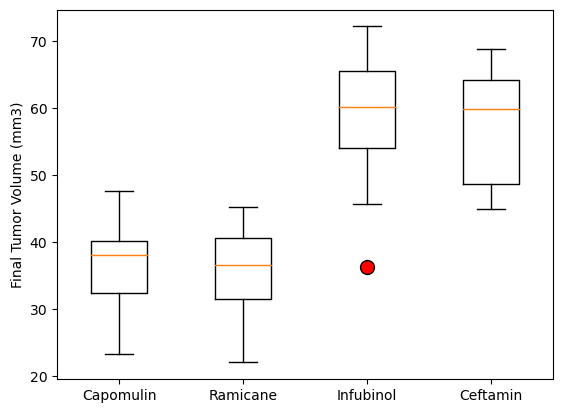

In [249]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_val = drug_regimens
y_val = [tumor_vol[0]['Capomulin'], tumor_vol[1]['Ramicane'], tumor_vol[2]['Infubinol'], tumor_vol[3]['Ceftamin']]

plt.boxplot(y_val, labels=x_val, flierprops={'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [266]:
# For graph reference
pprint(cleaned_df[cleaned_df['Mouse ID'] == 's185'])

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
10     s185          0           45.000000                 0    Capomulin   
11     s185          5           43.878496                 0    Capomulin   
12     s185         10           37.614948                 0    Capomulin   
13     s185         15           38.177232                 0    Capomulin   
14     s185         20           36.866876                 0    Capomulin   
15     s185         25           33.949940                 0    Capomulin   
16     s185         30           32.959671                 1    Capomulin   
17     s185         35           28.328531                 1    Capomulin   
18     s185         40           25.472143                 1    Capomulin   
19     s185         45           23.343598                 1    Capomulin   

       Sex  Age_months  Weight (g)  
10  Female           3          17  
11  Female           3          17  
12  Female           3          17  
13  

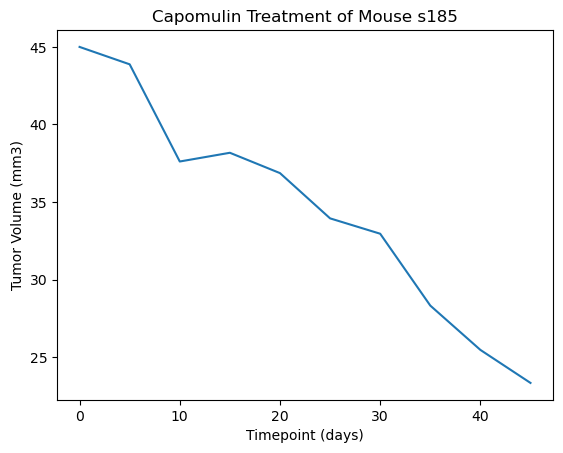

In [279]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# s185
one_mouse = cleaned_df[cleaned_df['Mouse ID'] == 's185']['Tumor Volume (mm3)'].tolist()
one_x = cleaned_df[cleaned_df['Mouse ID'] == 's185']['Timepoint'].tolist()

plt.plot(one_x, one_mouse)
plt.title('Capomulin Treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

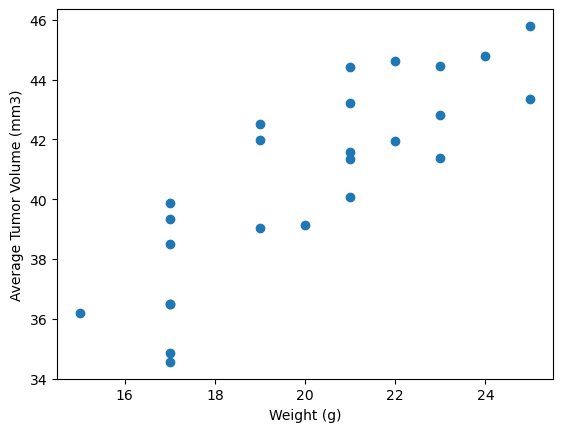

In [305]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_weight = cap_df.groupby(['Mouse ID'])['Weight (g)'].mean()
avg_size = cap_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()


plt.scatter(mouse_weight, avg_size)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


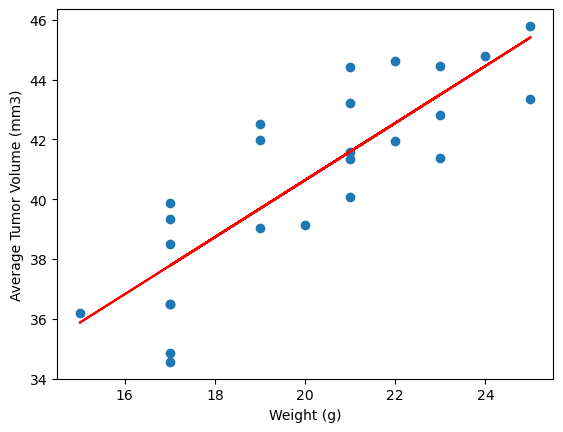

In [311]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_size)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values,"r-")
plt.scatter(mouse_weight, avg_size)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}')
plt.show()